# Tree Based Methods

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
import pydotplus
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [89]:
hitters= pd.read_csv('Dataset/Hitters.csv', index_col= 0).dropna()

In [90]:
hitters.head()
print(hitters.columns[0:7])

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years'], dtype='object')


## Regression Tree

In [91]:
X= hitters[['Years', 'Hits']]
y=hitters.Salary

In [92]:
regressor = DecisionTreeRegressor(random_state = 0, max_leaf_nodes=3)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

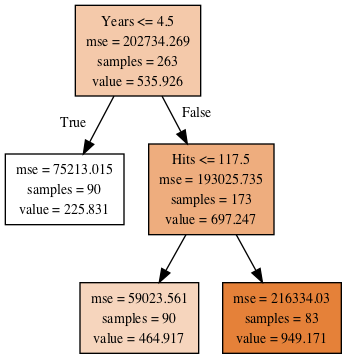

In [93]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, feature_names=['Years', 'Hits'], 
                filled=True, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Text(0.5,1,'The three-region partition for the Hitters Data')

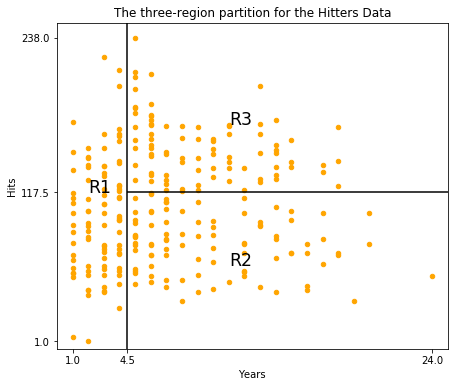

In [94]:
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')
plt.title('The three-region partition for the Hitters Data')

## Tree Size

In [95]:
#unpruned trees

In [96]:
x= hitters.drop(['League', 'Division', 'NewLeague','Salary'], axis=1)
hitters.columns
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.5, random_state =0)

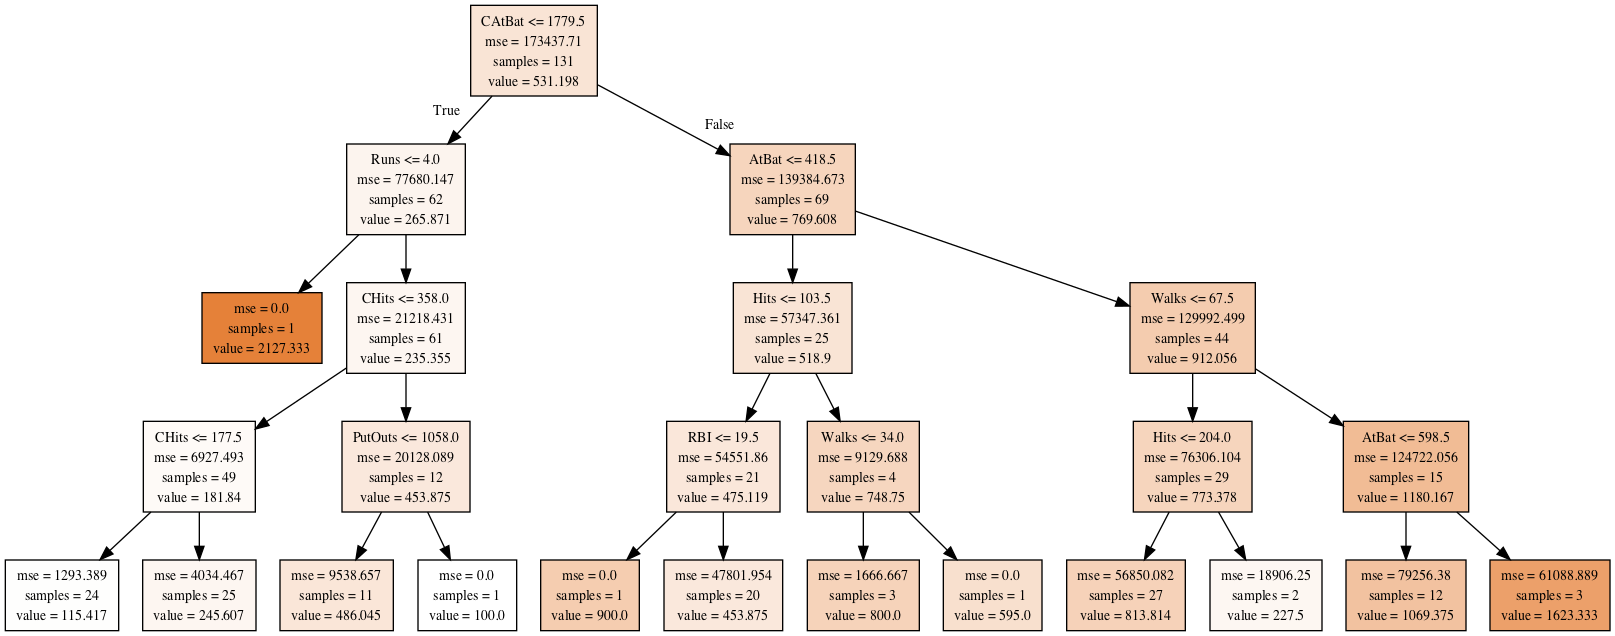

In [97]:
regressor2 = DecisionTreeRegressor(random_state =0 , max_features=9 ,max_depth=4)
regressor2.fit(x_train, y_train)
dot_data = StringIO()
export_graphviz(regressor2, out_file=dot_data, feature_names=x.columns, 
                filled=True, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [98]:
mse =[]
tree_size=  np.arange(1,11)
for i in tree_size:
    regressor3 = DecisionTreeRegressor(random_state = 0, max_depth=i, max_features=9)
    mod= regressor3.fit(x_train, y_train)
    pred = mod.predict(x_test)
    mse.append(mean_squared_error(pred, y_test))

Text(0,0.5,'Mean Squared Error')

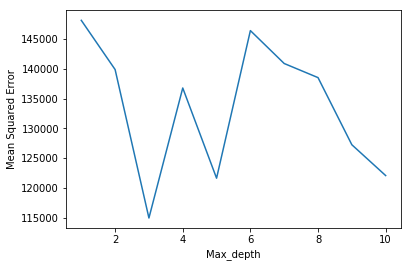

In [99]:
plt.plot(tree_size, mse)
plt.xlabel('Max_depth')
plt.ylabel('Mean Squared Error')

##this graph looks very weird. It was supposed to be a downward line.

## Classification Tree

In [78]:
## load Heart dataset
heart = pd.read_csv('Dataset/Heart.csv', index_col=0).dropna()
heart.head()
heart.Thal= pd.factorize(heart.Thal)[0]
heart.ChestPain = pd.factorize(heart.ChestPain)[0]
heart.AHD= pd.factorize(heart.AHD)[0]
heart.head()
y= heart.AHD
X= heart.drop('AHD', axis=1)

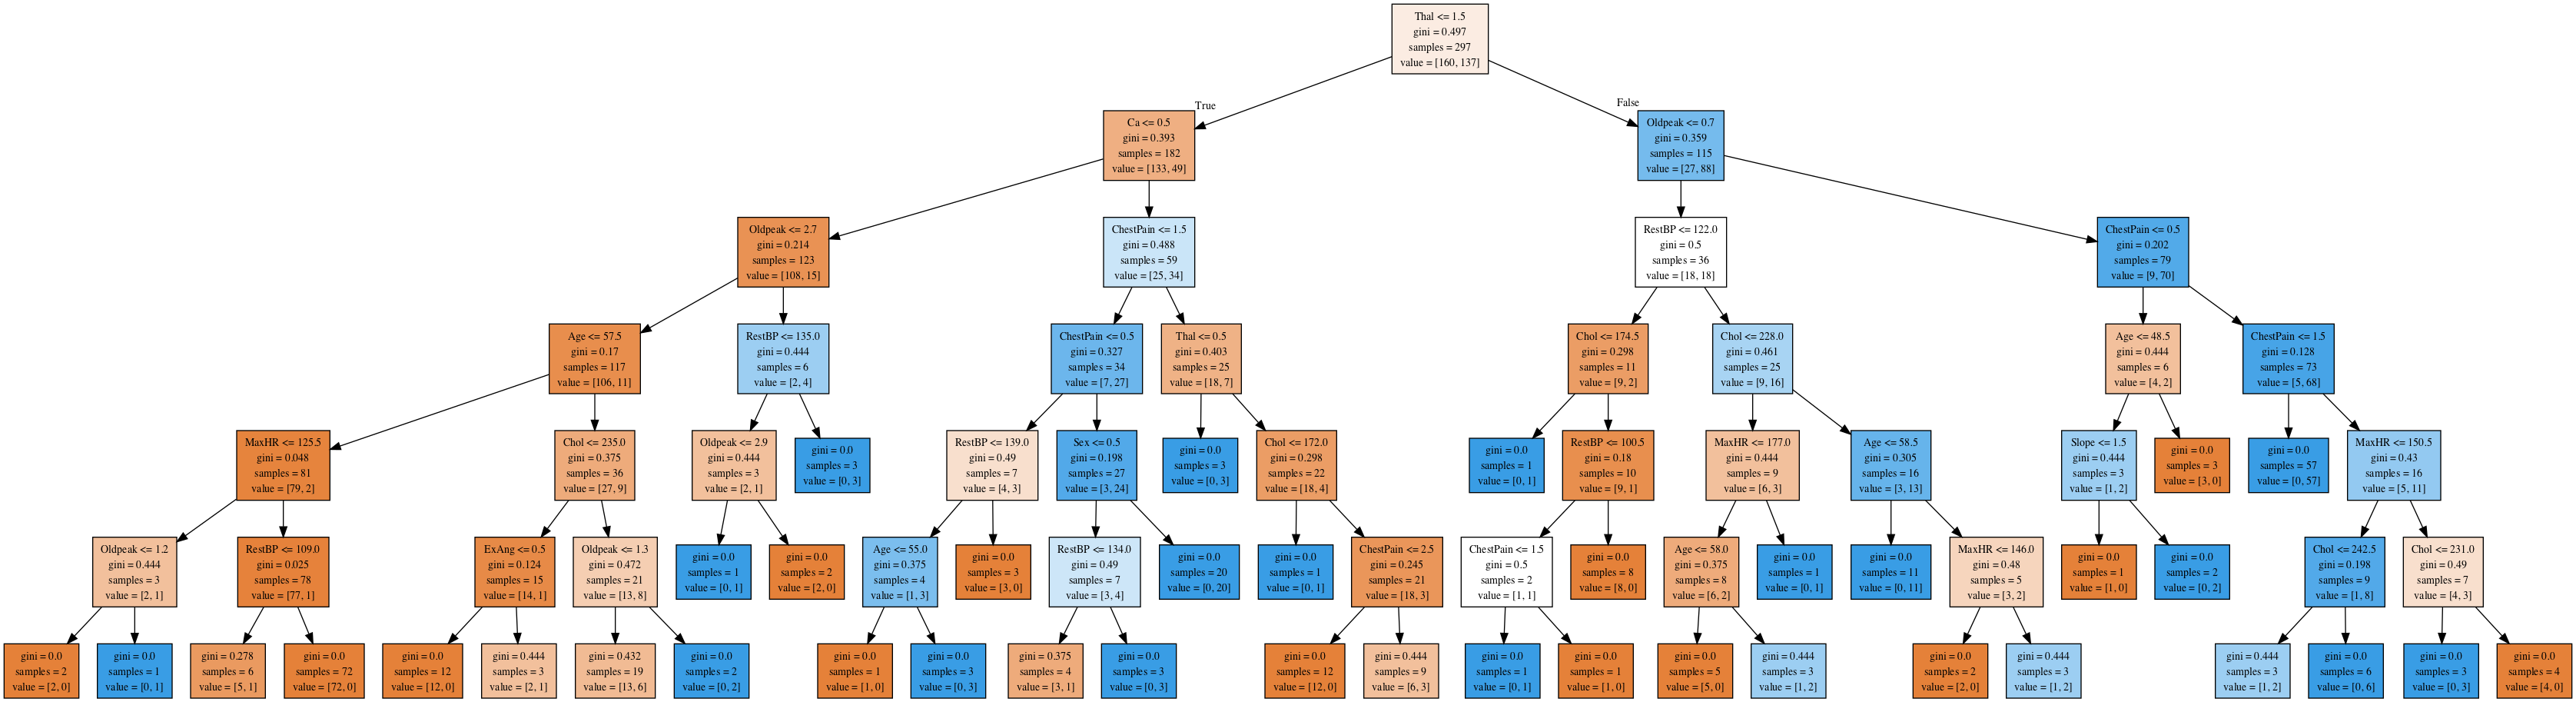

In [79]:
# Unpruned Tree
classifier= DecisionTreeClassifier(max_depth=6)
classifier.fit(X,y)
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=X.columns, filled=True, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

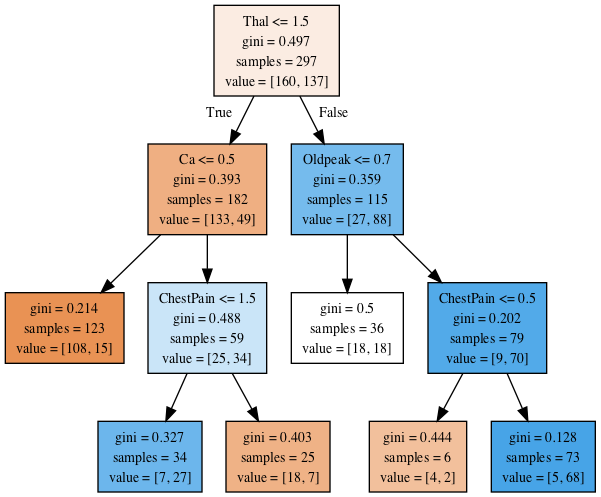

In [80]:
#choose size 4
classifier2= DecisionTreeClassifier(max_leaf_nodes=6)
classifier2.fit(X,y)
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data, feature_names=X.columns, filled=True, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [142]:
##Lab
carseats = pd.read_csv('Dataset/Carseats.csv').dropna()
#high= np.where(carseats.Sales<=8, 0, 1)
carseats['high']= pd.Series(np.where(carseats.Sales<=8, 0, 1))
carseats= carseats.drop('Unnamed: 0', axis=1)
carseats.ShelveLoc= pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = pd.factorize(carseats.Urban)[0]
carseats.US= pd.factorize(carseats.US)[0]
carseats.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,9.50,138,73,11,276,120,0,42,17,0,0,1
1,11.22,111,48,16,260,83,1,65,10,0,0,1
2,10.06,113,35,10,269,80,2,59,12,0,0,1
3,7.40,117,100,4,466,97,2,55,14,0,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1,0


In [154]:
X= carseats.drop(['high','Sales'],axis=1)
y= carseats.high
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.5, random_state=0)

In [155]:
carseats_classifier= DecisionTreeClassifier(max_depth=6)
carseats_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

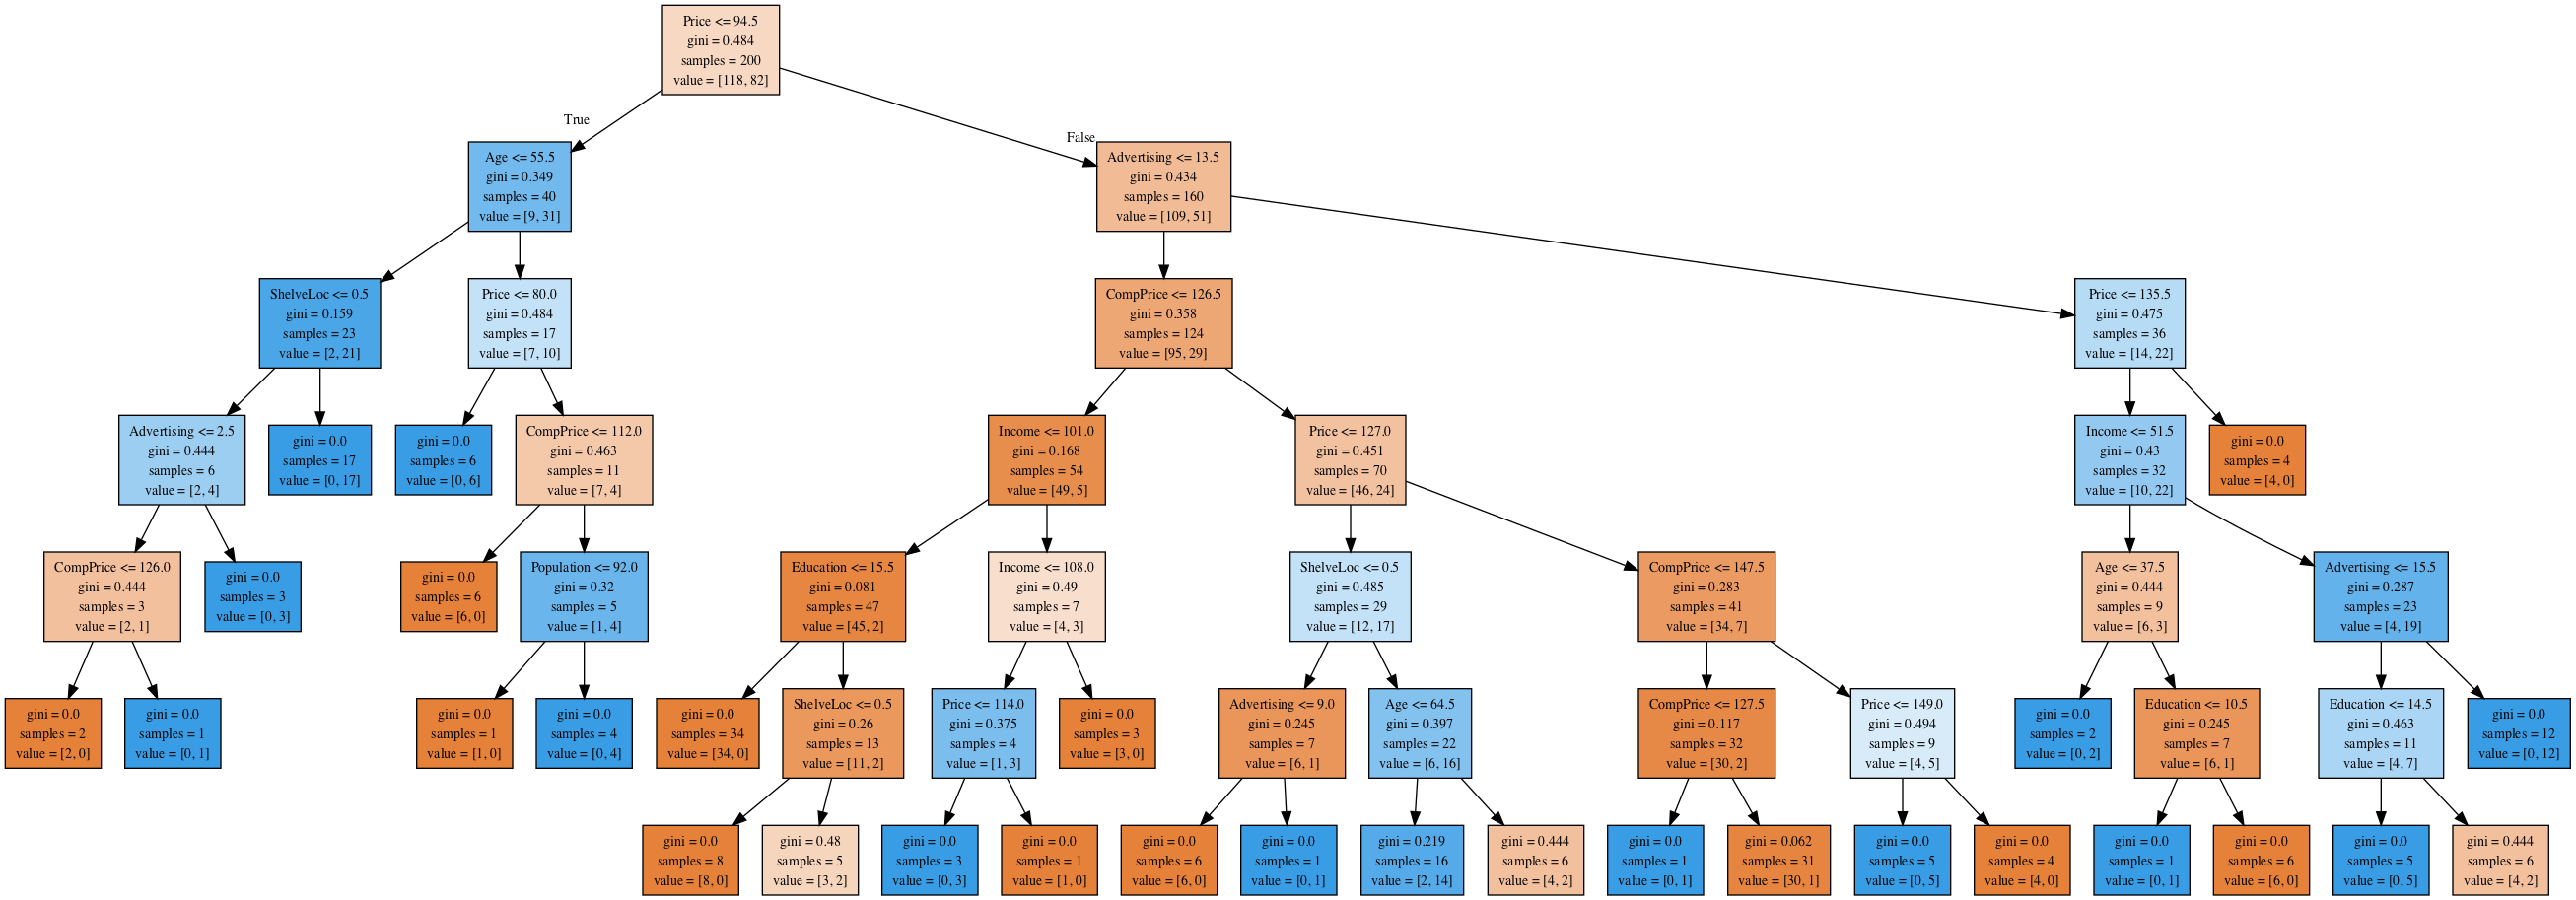

In [156]:

dot_data = StringIO()
export_graphviz(carseats_classifier, out_file=dot_data, feature_names=X.columns, filled=True, class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [159]:
pred= carseats_classifier.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,99,32
Yes,19,50


In [160]:
(99+50)/200

0.745

In [3]:
# load Boston Dataset
boston= pd.read_csv('Dataset/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
boston.info()
y= boston.medv
x=  boston.drop('medv', axis=1)
x.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


(506, 13)

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.5, random_state =1)
boston_regressor = DecisionTreeRegressor()
boston_model= boston_regressor.fit(x_train, y_train)
boston_pred= boston_model.predict(x_test)
boston_mse= mean_squared_error(boston_pred, y_test)
boston_mse

22.043557312252965

## Bagging

In [23]:
bagging= RandomForestRegressor(max_features=13, random_state=1)
bagging.fit(x_train, y_train)
bagging_pred= bagging.predict(x_test)
bagging_mse= mean_squared_error(bagging_pred, y_test)
bagging_mse

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


15.950718181818184

In [24]:
# MSE decreased from Regression tree model's 22.04 to 15.95

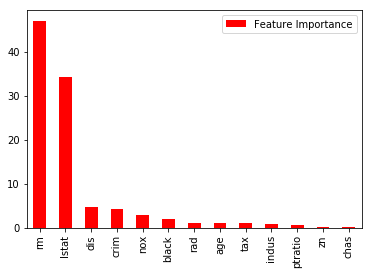

In [50]:
#feature importance
bagging_featureImportance = pd.DataFrame({'Feature Importance':bagging.feature_importances_*100},index =x.columns)
bagging_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

## Random Forest

In [25]:
rf= RandomForestRegressor(max_features=6, random_state=1)
rf.fit(x_train, y_train)
rf_pred= rf.predict(x_test)
rf_mse= mean_squared_error(rf_pred, y_test)
rf_mse

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


13.01997865612648

In [26]:
# MSE decreased to 13.02

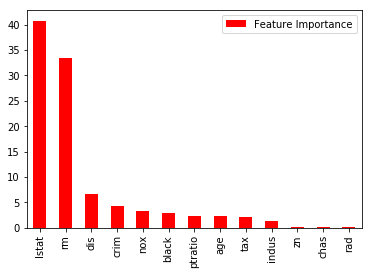

In [49]:
rf_featureImportance= pd.DataFrame({'Feature Importance':rf.feature_importances_*100}, index= x.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

## Boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(n_estimators=5000, random_state=1)
gbr.fit(x_train, y_train)
gbr_pred= gbr.predict(x_test)
gbr_mse= mean_squared_error(gbr_pred, y_test)
gbr_mse

11.007016050836905

In [43]:
# MSE decreased to 11

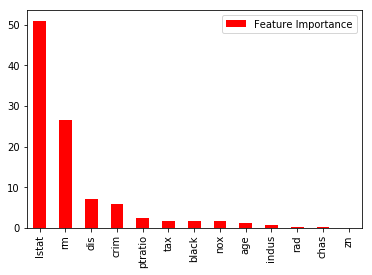

In [48]:
gbr_featureimportance= pd.DataFrame({'Feature Importance': gbr.feature_importances_*100}, index= x.columns)
gbr_featureimportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')